In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.8.0
Hub version: 0.12.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [ ]:
!unzip "/content/drive/MyDrive/Sign Language Project/asl-full.zip"

Streaming output truncated to the last 5000 lines.
  inflating: asl-full/validation/S/S2801.jpg  
  inflating: asl-full/validation/S/S2802.jpg  
  inflating: asl-full/validation/S/S2803.jpg  
  inflating: asl-full/validation/S/S2804.jpg  
  inflating: asl-full/validation/S/S2805.jpg  
  inflating: asl-full/validation/S/S2806.jpg  
  inflating: asl-full/validation/S/S2807.jpg  
  inflating: asl-full/validation/S/S2808.jpg  
  inflating: asl-full/validation/S/S2809.jpg  
  inflating: asl-full/validation/S/S2810.jpg  
  inflating: asl-full/validation/S/S2811.jpg  
  inflating: asl-full/validation/S/S2812.jpg  
  inflating: asl-full/validation/S/S2813.jpg  
  inflating: asl-full/validation/S/S2814.jpg  
  inflating: asl-full/validation/S/S2815.jpg  
  inflating: asl-full/validation/S/S2816.jpg  
  inflating: asl-full/validation/S/S2817.jpg  
  inflating: asl-full/validation/S/S2818.jpg  
  inflating: asl-full/validation/S/S2819.jpg  
  inflating: asl-full/validation/S/S2820.jpg  
  inflati

In [ ]:
import numpy as np 
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.applications import resnet
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from keras.layers import Conv2D

from keras.layers import MaxPooling2D

In [ ]:
# input path for the images
base_path = '/content/asl-full/train/'

In [ ]:
SIZE=64
image_size = (SIZE, SIZE)
batch_size = 32
channels = 3
kernel = 4
stride = 1
pool = 2

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)

Found 69600 files belonging to 29 classes.
Using 55680 files for training.
Found 69600 files belonging to 29 classes.
Using 13920 files for validation.


In [ ]:
class_names = train_ds.class_names
num_classes = len(class_names)

# Ameliorated CNN

In [ ]:
model=Sequential()

model.add(Conv2D(16,kernel_size=kernel,strides=stride,padding='same',activation='relu',input_shape=(SIZE, SIZE, channels)))

model.add(MaxPool2D(pool_size=pool,strides=2,padding='same'))

model.add(Conv2D(32,kernel_size=kernel,strides=stride,activation='relu',padding='same'))

model.add(MaxPool2D((pool),2,padding='same'))

model.add(Conv2D(64,kernel_size=kernel,strides=stride,activation='relu',padding='same'))

model.add(MaxPool2D((pool),2,padding='same'))
          
model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=num_classes,activation='softmax'))

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        32832     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='checkpoint.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
epochs = 15
history = model.fit(
    train_ds, epochs=epochs, callbacks=model_checkpoint, validation_data=val_ds,
)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1740/1740 [==============================] - 44s 24ms/step - loss: 1.1275 - accuracy: 0.7135 - val_loss: 0.1854 - val_accuracy: 0.9364
Epoch 2/15
1740/1740 [==============================] - 40s 23ms/step - loss: 0.1671 - accuracy: 0.9453 - val_loss: 0.4071 - val_accuracy: 0.8857
Epoch 3/15
1740/1740 [==============================] - 39s 23ms/step - loss: 0.1276 - accuracy: 0.9608 - val_loss: 0.1710 - val_accuracy: 0.9483
Epoch 4/15
1740/1740 [==============================] - 39s 22ms/step - loss: 0.1125 - accuracy: 0.9662 - val_loss: 0.0984 - val_accuracy: 0.9710
Epoch 5/15
1740/1740 [==============================] - 39s 22ms/step - loss: 0.0868 - accuracy: 0.9755 - val_loss: 0.0859 - val_accuracy: 0.9790
Epoch 6/15
1740/1740 [==============================] - 39s 22ms/step - loss: 0.0876 - accuracy: 0.9773 - val_loss: 0.0626 - val_accuracy: 0.9838
Epoch 7/15
1740/1740 [==============================] - 39s 22ms/step - loss: 0.0811 - accuracy: 0.9806 - val_loss: 0.0798 - val_accura

In [ ]:
#save the model for predictions
model.save('/content/drive/MyDrive/Dataset of Sign_Language/full_model_asl_CNN.h5')

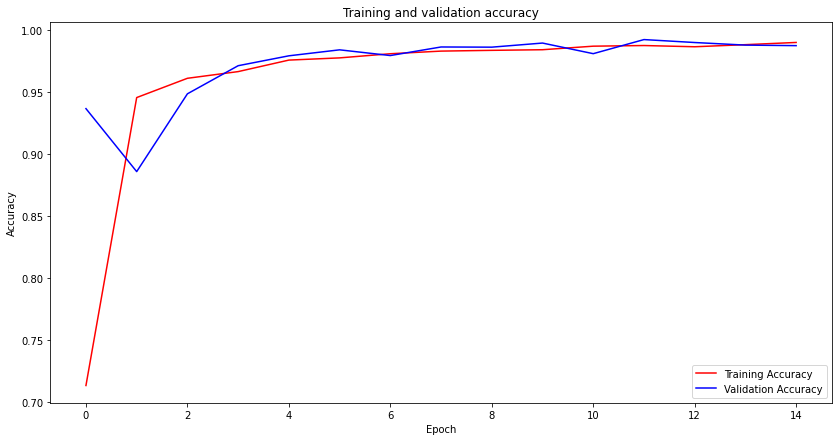

In [ ]:
# Validation and Training accuracy plot
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

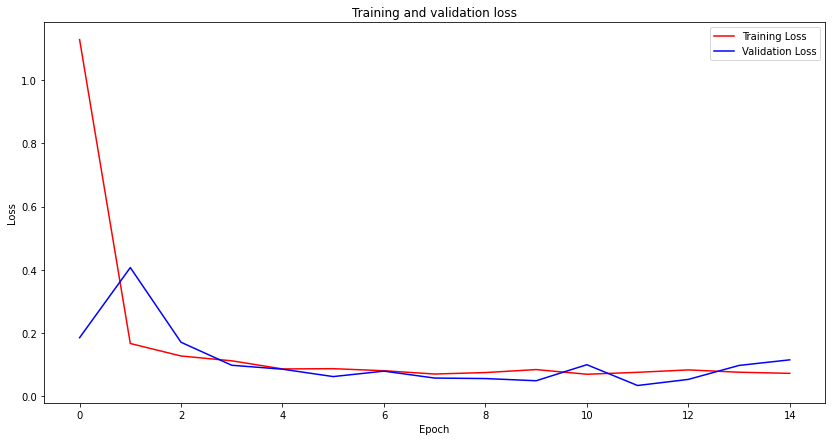

In [ ]:
#Validation and Training loss plot
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
#Show predicition for one image

import tensorflow as tf
import cv2
import numpy as np
from skimage import transform


CATEGORIES = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']



def convert(np_image):
   np_image = np.array(np_image).astype('float32')
   np_image = transform.resize(np_image, (64, 64, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

model = tf.keras.models.load_model("/content/drive/MyDrive/Sign Language Project/full_model_asl.h5")

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Sign Language Project/test/M_test.jpg")
img.shape

(200, 200, 3)

In [ ]:
image = convert(img)
image.shape

(1, 64, 64, 3)

In [ ]:
prediction = model.predict(image)

In [ ]:
print(CATEGORIES[int(np.argmax(prediction[0]))])

M


In [ ]:
img = cv2.imread("/content/drive/MyDrive/Sign Language Project/test/P_test.jpg")
img.shape

(200, 200, 3)

In [ ]:
image = convert(img)
image.shape

(1, 64, 64, 3)

In [ ]:
prediction = model.predict(image)

In [ ]:
print(CATEGORIES[int(np.argmax(prediction[0]))])

P


# RESNET50

In [ ]:
classifier_resnet = resnet.ResNet50(input_shape= (64,64,3),include_top=False,weights='imagenet')
for layer in classifier_resnet.layers:
    layer.trainable = False

In [ ]:
classifier2 = classifier_resnet.output#head mode
classifier2 = Flatten()(classifier2)#adding layer of flatten
classifier2 = Dropout(0.6)(classifier2)
classifier2 = Dense(units=num_classes, activation='softmax')(classifier2)

model2 = Model(inputs = classifier_resnet.input , outputs = classifier2)
model2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [ ]:
history2 = model2.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1740/1740 [==============================] - 55s 29ms/step - loss: 0.9732 - accuracy: 0.8006 - val_loss: 0.1455 - val_accuracy: 0.9618
Epoch 2/15
1740/1740 [==============================] - 48s 28ms/step - loss: 0.5228 - accuracy: 0.9013 - val_loss: 0.1265 - val_accuracy: 0.9693
Epoch 3/15
1740/1740 [==============================] - 48s 27ms/step - loss: 0.4890 - accuracy: 0.9178 - val_loss: 0.1093 - val_accuracy: 0.9756
Epoch 4/15
1740/1740 [==============================] - 47s 27ms/step - loss: 0.4647 - accuracy: 0.9289 - val_loss: 0.0829 - val_accuracy: 0.9833
Epoch 5/15
1740/1740 [==============================] - 48s 27ms/step - loss: 0.4514 - accuracy: 0.9349 - val_loss: 0.0729 - val_accuracy: 0.9855
Epoch 6/15
1740/1740 [==============================] - 48s 27ms/step - loss: 0.4224 - accuracy: 0.9408 - val_loss: 0.0758 - val_accuracy: 0.9865
Epoch 7/15
1740/1740 [==============================] - 47s 27ms/step - loss: 0.4129 - accuracy: 0.9460 - val_loss: 0.0758 - val_accura

In [ ]:
model2.save('/content/drive/MyDrive/Dataset of Sign_Language/full_model_asl_resnet.h5')

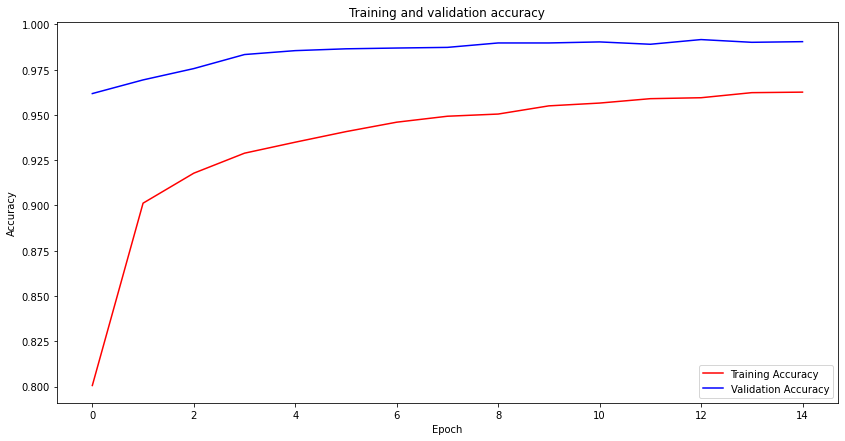

In [ ]:
# Validation and Training accuracy plot
acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

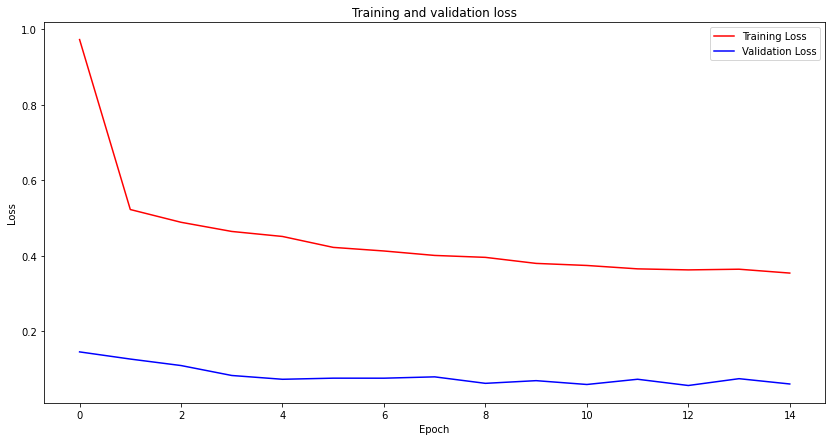

In [ ]:
#Validation and Training loss plot
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

# VGG16

In [ ]:
classifier_vgg16 = VGG16(input_shape= (64,64,3),include_top=False,weights='imagenet')
for layer in classifier_vgg16.layers:
    layer.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
classifier3 = classifier_vgg16.output#head mode
classifier3 = Flatten()(classifier3)#adding layer of flatten
classifier3 = Dense(units=256, activation='relu')(classifier3)
classifier3 = Dropout(0.6)(classifier3)
classifier3 = Dense(units=num_classes, activation='softmax')(classifier3)

model3 = Model(inputs = classifier_vgg16.input , outputs = classifier3)
model3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [ ]:
history3 = model3.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1740/1740 [==============================] - 49s 27ms/step - loss: 2.1311 - accuracy: 0.4393 - val_loss: 0.5503 - val_accuracy: 0.8341
Epoch 2/15
1740/1740 [==============================] - 48s 28ms/step - loss: 1.1408 - accuracy: 0.6323 - val_loss: 0.3090 - val_accuracy: 0.8975
Epoch 3/15
1740/1740 [==============================] - 41s 24ms/step - loss: 0.9270 - accuracy: 0.6961 - val_loss: 0.2632 - val_accuracy: 0.9096
Epoch 4/15
1740/1740 [==============================] - 42s 24ms/step - loss: 0.8250 - accuracy: 0.7340 - val_loss: 0.1878 - val_accuracy: 0.9457
Epoch 5/15
1740/1740 [==============================] - 43s 25ms/step - loss: 0.7659 - accuracy: 0.7565 - val_loss: 0.1351 - val_accuracy: 0.9591
Epoch 6/15
1740/1740 [==============================] - 45s 26ms/step - loss: 0.7119 - accuracy: 0.7743 - val_loss: 0.1185 - val_accuracy: 0.9635
Epoch 7/15
1740/1740 [==============================] - 41s 24ms/step - loss: 0.6602 - accuracy: 0.7917 - val_loss: 0.1324 - val_accura

In [ ]:
model3.save('/content/drive/MyDrive/Dataset of Sign_Language/full_model_asl_vgg16.h5')

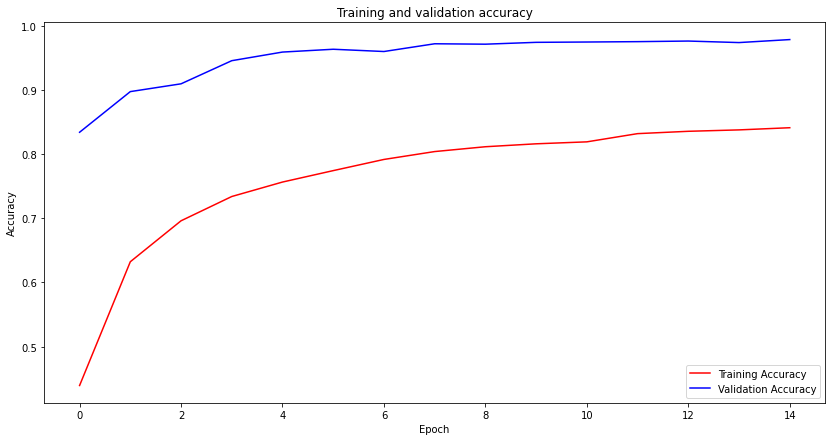

In [ ]:
# Validation and Training accuracy plot
acc=history3.history['accuracy']
val_acc=history3.history['val_accuracy']
loss=history3.history['loss']
val_loss=history3.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

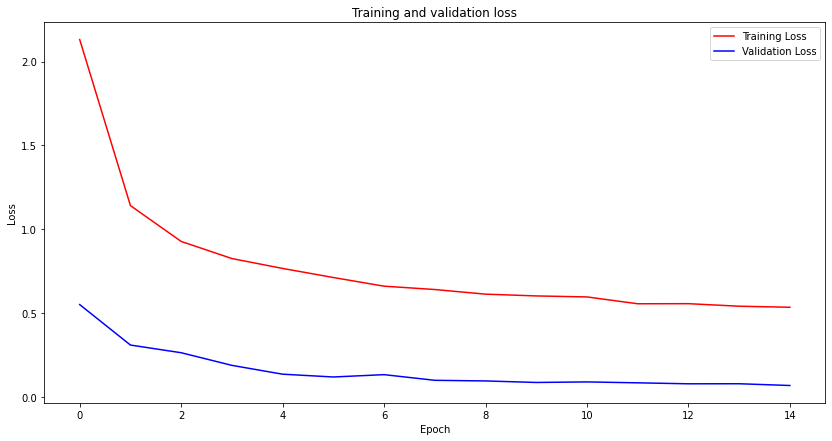

In [ ]:
#Validation and Training loss plot
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')